In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
data = pd.read_csv('train.csv')

In [76]:
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [78]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


Peu de personnes sont concernés par 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa' et 'VRDeck'

C:\ProgramData\anaconda3\envs\spaceship\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\envs\spaceship\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


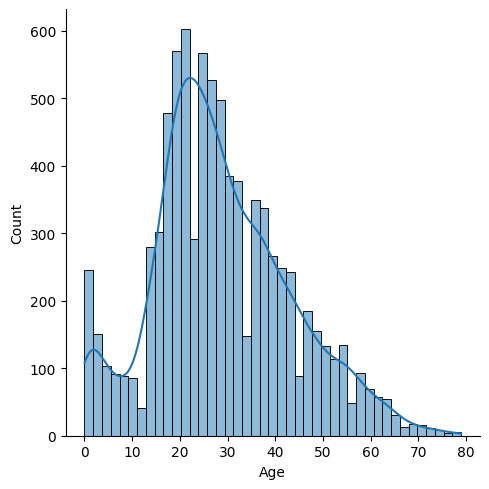

In [79]:
sns.displot(data, x='Age', kde = True)
plt.show()

In [80]:
data['HomePlanet'].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [81]:
data['CryoSleep'].value_counts()

CryoSleep
False    5439
True     3037
Name: count, dtype: int64

In [82]:
data['Cabin'].value_counts()

Cabin
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: count, Length: 6560, dtype: int64

Il faut séparer les cabines en fonction du pont(première lettre) et du côté(dernière lettre). Attention au nombre de personnes par cabine

In [83]:
data['Destination'].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [84]:
data['VIP'].value_counts()

VIP
False    8291
True      199
Name: count, dtype: int64

C:\ProgramData\anaconda3\envs\spaceship\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\envs\spaceship\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\envs\spaceship\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\envs\spaceship\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

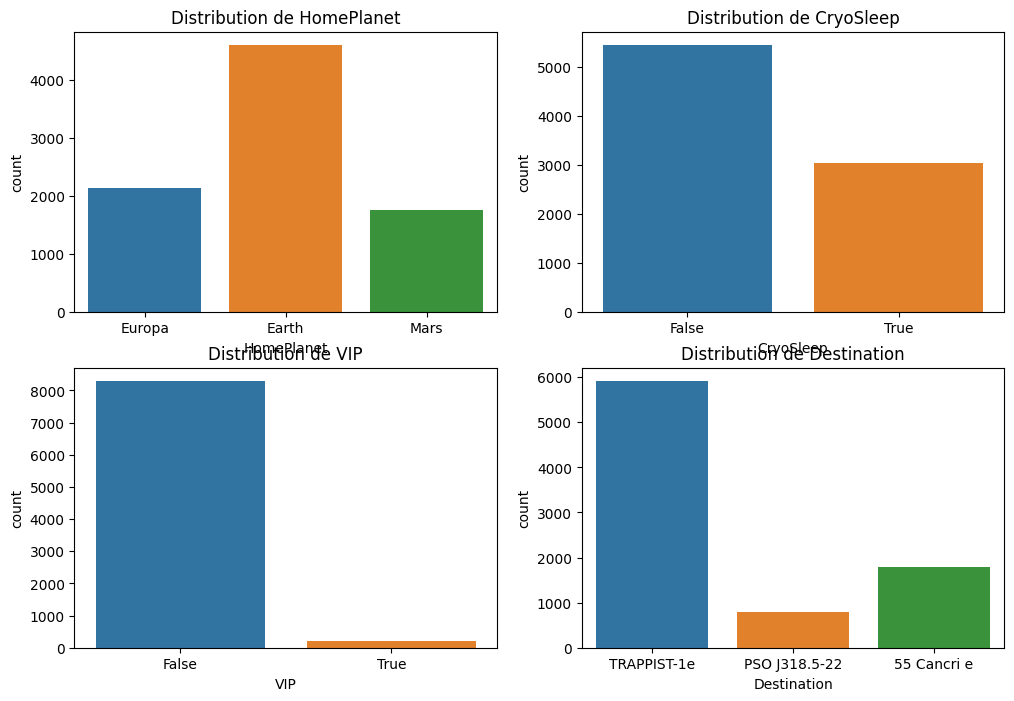

In [85]:
cols = ['HomePlanet', 'CryoSleep', 'VIP', 'Destination']

plt.figure(figsize=(12, 8))

for i, column in enumerate(cols):
    plt.subplot(2,2,i+1)
    sns.countplot(data, x=column)
    plt.title(f'Distribution de {column}')
    
plt.show()

In [86]:
target = data['Transported']
target.value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

La distribution des valeurs de la target est équilibrée

In [87]:
data.drop('Transported', axis = 1, inplace = True)

### Séparation des variables par catégorie

In [88]:
var_num = data.select_dtypes(['int','float']).columns.to_list()
var_cat = data.select_dtypes('object').columns.to_list()

### vérifions les doublons 

In [89]:
data.duplicated('PassengerId').sum()

0

### valeurs manquantes

In [90]:
data.isna().mean()

PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
dtype: float64

<Axes: >

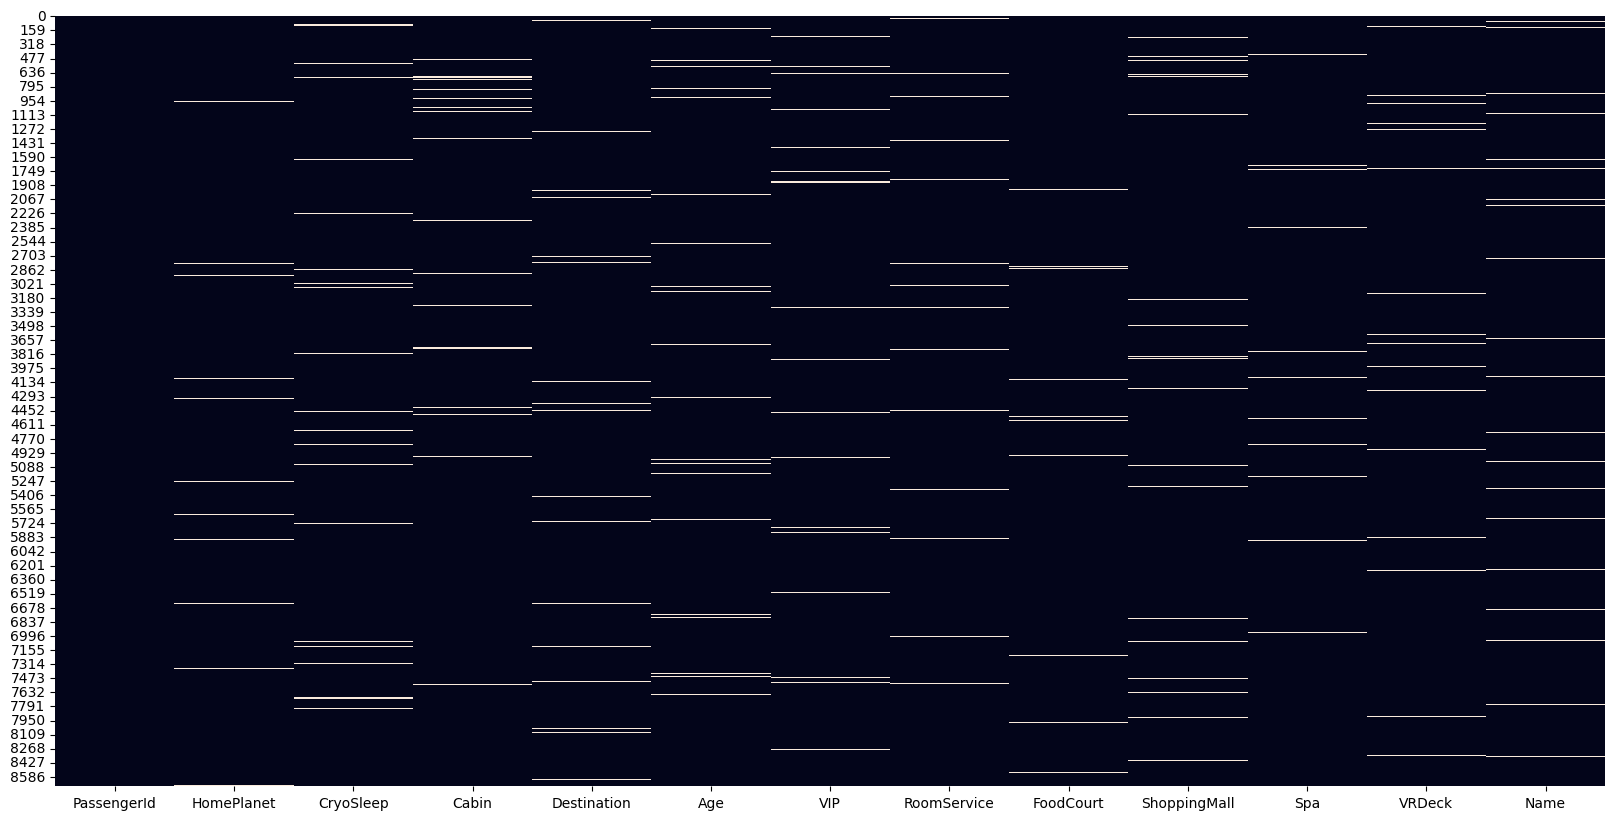

In [91]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(),cbar=False)

In [92]:
# on remplace les valeurs manquantes numériques par la médiane de la colonne
data[var_num].median()

Age             27.0
RoomService      0.0
FoodCourt        0.0
ShoppingMall     0.0
Spa              0.0
VRDeck           0.0
dtype: float64

In [93]:
data['Age'].fillna(27, inplace = True)

In [94]:
data[var_num] = data[var_num].fillna(0)

In [95]:
data['CryoSleep']

0       False
1       False
2       False
3       False
4       False
        ...  
8688    False
8689     True
8690    False
8691    False
8692    False
Name: CryoSleep, Length: 8693, dtype: object

In [96]:
var_cat

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Name']

In [97]:
# on remplace les nan de HomePlanet par Earth
data['HomePlanet'].fillna('Earth', inplace = True)

In [98]:
# on remplace les nan de CryoSleep par false
data['CryoSleep'].fillna(False, inplace = True)

In [99]:
# on remplace les nan de Cabin par 'nan'
data['Cabin'].fillna('nan', inplace = True)

In [100]:
# on remplace les nan de Destination par 'TRAPPIST-1e'
data['Destination'].fillna('TRAPPIST-1e', inplace = True)

In [101]:
# on remplace les nan de VIP par false
data['VIP'].fillna(False, inplace = True)

In [102]:
data.isna().mean()

PassengerId     0.000000
HomePlanet      0.000000
CryoSleep       0.000000
Cabin           0.000000
Destination     0.000000
Age             0.000000
VIP             0.000000
RoomService     0.000000
FoodCourt       0.000000
ShoppingMall    0.000000
Spa             0.000000
VRDeck          0.000000
Name            0.023007
dtype: float64

### Modification de l'age

In [103]:
# on créé une tranche d'age
bins = [-1, 9, 19, 29, 39, 49, 59, 69, 79]
labels = range(8)
data['Tranche_age'] = pd.cut(data['Age'], bins = bins, labels = labels)

In [104]:
# on supprime l'age
data.drop('Age', axis = 1, inplace = True)

### Suppression des noms et id

In [105]:
data.drop('Name', axis = 1, inplace = True)

In [106]:
data.drop('PassengerId', axis = 1, inplace = True)

### Séparation de la variable cabine

In [107]:
# la première lettre correspond au pont
data['Pont'] = data['Cabin'].apply(lambda x : x[0])

In [108]:
# la dernière lette correspond à la vue
data['vue']= data['Cabin'].apply(lambda x : x[-1])

In [109]:
# on compte le nombre de passagers par cabine
data['occupants'] = data.groupby('Cabin')['Cabin'].transform('count')

In [110]:
# on supprime la variable 'Cabin'
data.drop('Cabin', axis = 1, inplace = True)

In [111]:
data

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Tranche_age,Pont,vue,occupants
0,Europa,False,TRAPPIST-1e,False,0.0,0.0,0.0,0.0,0.0,3,B,P,1
1,Earth,False,TRAPPIST-1e,False,109.0,9.0,25.0,549.0,44.0,2,F,S,1
2,Europa,False,TRAPPIST-1e,True,43.0,3576.0,0.0,6715.0,49.0,5,A,S,2
3,Europa,False,TRAPPIST-1e,False,0.0,1283.0,371.0,3329.0,193.0,3,A,S,2
4,Earth,False,TRAPPIST-1e,False,303.0,70.0,151.0,565.0,2.0,1,F,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,True,0.0,6819.0,0.0,1643.0,74.0,4,A,P,1
8689,Earth,True,PSO J318.5-22,False,0.0,0.0,0.0,0.0,0.0,1,G,S,1
8690,Earth,False,TRAPPIST-1e,False,0.0,0.0,1872.0,1.0,0.0,2,G,S,1
8691,Europa,False,55 Cancri e,False,0.0,1049.0,0.0,353.0,3235.0,3,E,S,2


In [112]:
data['CryoSleep'].value_counts()

CryoSleep
False    5656
True     3037
Name: count, dtype: int64

### Séparation en jeu d'entraînement et de test

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.25, random_state = 0)

In [115]:
y_train.value_counts()

Transported
True     3281
False    3238
Name: count, dtype: int64

### Encodage et normalisation

In [116]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

In [117]:
var_num = data.select_dtypes(['int','float']).columns.drop(['occupants']).to_list()
var_cat = data.select_dtypes('object').columns.to_list()

In [118]:
preprocessor = make_column_transformer((StandardScaler(), var_num), 
                                      (OneHotEncoder(handle_unknown = 'ignore',sparse_output=False),var_cat),
                                      remainder = 'passthrough')  

In [119]:
X_train_nrm = preprocessor.fit_transform(X_train)
X_test_nrm = preprocessor.transform(X_test)

In [120]:
X_train_nrm

array([[-0.33402186294488556, -0.2823132153993363, -0.2755752667151108,
        ..., False, 3, 1],
       [-0.33402186294488556, -0.2823132153993363, -0.2755752667151108,
        ..., False, 4, 2],
       [-0.06987275178987455, -0.2823132153993363, -0.2755752667151108,
        ..., False, 2, 1],
       ...,
       [0.42504398944011856, -0.2823132153993363, -0.24254173455408473,
        ..., False, 2, 1],
       [-0.33402186294488556, -0.2823132153993363, -0.2755752667151108,
        ..., False, 0, 3],
       [-0.33402186294488556, -0.27653035490158956, -0.2755752667151108,
        ..., False, 4, 1]], dtype=object)

### Entraînement

#### 1) Random Forest

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [122]:
model = RandomForestClassifier(random_state = 0)

In [125]:
params = {'n_estimators' : [1000,2000,3000],
          'max_depth'    : [3,5,7,10]
         }

In [126]:
grid = GridSearchCV(model , params, scoring='accuracy', cv=5  , error_score='raise')
grid.fit(X_train_nrm,y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'n_estimators': [1000, 2000, 3000]},
             scoring='accuracy')

In [127]:
grid.best_score_

0.800736266944145

In [128]:
estimateur = grid.best_estimator_

In [276]:
pred = estimateur.predict(X_test_nrm)
pred

array([False,  True, False, ...,  True,  True,  True])

In [129]:
estimateur.score(X_test_nrm, y_test)

0.795768169273229

#### 2) Gradient Boosting

In [130]:
from sklearn.ensemble import GradientBoostingClassifier

In [131]:
model = GradientBoostingClassifier(random_state = 0)

In [133]:
params = {'learning_rate' : [0.01, 0.1],
          'n_estimators' : [100, 1000]
         }

In [ ]:
grid = GridSearchCV(model , params, scoring='accuracy', cv=5  , error_score='raise')
grid.fit(X_train_nrm,y_train)

In [ ]:
grid.best_score_

In [ ]:
estimateur = grid.best_estimator_

In [ ]:
estimateur.score(X_test_nrm, y_test)